Step 1: Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('iris_data.csv')

In [3]:
df.head(3)

,col1,col2,col3,col4,col5
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [4]:
df = df.rename(columns={ "col1":"sepal_length" ,'col2':'sepal_width','col3':'petal_length','col4':'petal_width','col5':'Class'})

In [5]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
Class            object
dtype: object

In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
Class           0
dtype: int64

In [8]:
df.shape

(150, 5)

In [9]:
df.info

<bound method DataFrame.info of      sepal_length  sepal_width  petal_length  petal_width           Class
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
..            ...          ...           ...          ...             ...
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

[150 rows x 5 columns]>

In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Step 2: Data visualization

<Figure size 576x432 with 0 Axes>

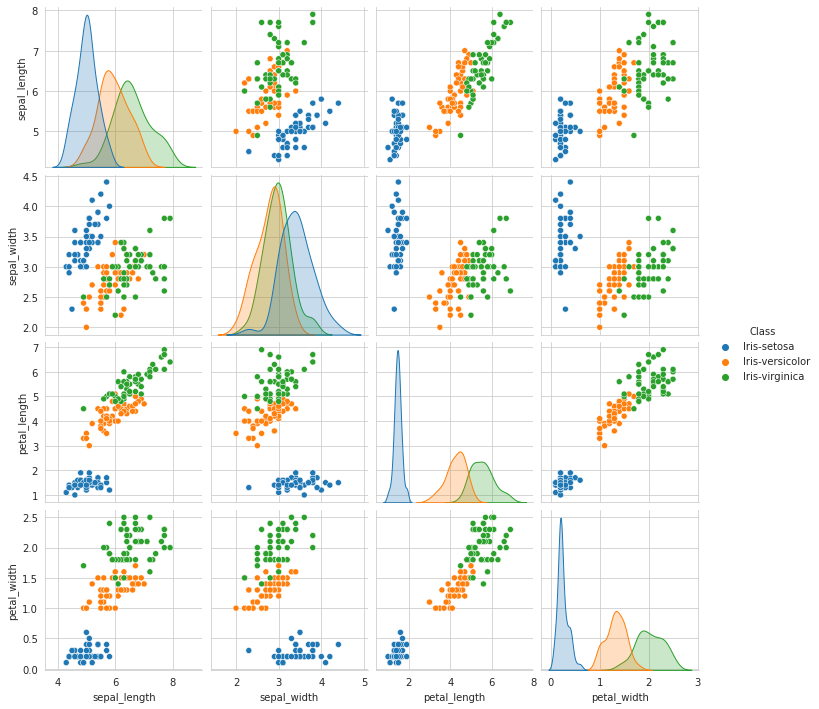

In [11]:
plt.figure(figsize=(8,6))
sns.set_style('whitegrid')
sns.pairplot(df, kind='scatter', hue='Class')

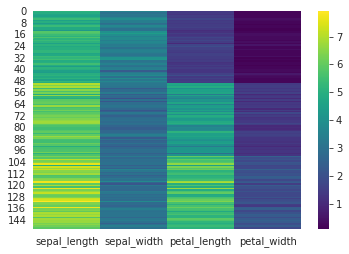

In [12]:
sns.heatmap(data=df[['sepal_length'	,'sepal_width',	'petal_length',	'petal_width']], cmap ='viridis')

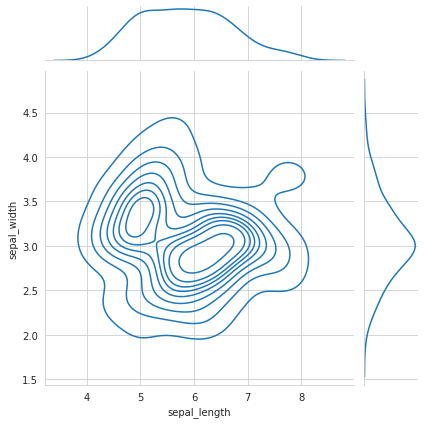

In [13]:
sns.jointplot(data = df, x='sepal_length', y='sepal_width',kind='kde')

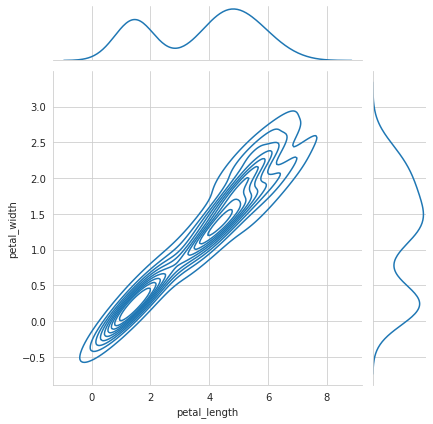

In [14]:
sns.jointplot(data = df, x='petal_length', y='petal_width',kind='kde')

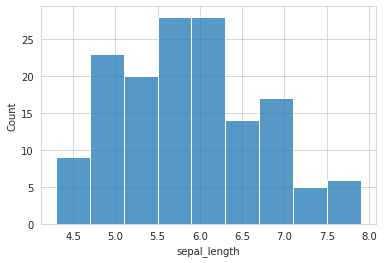

In [15]:
sns.histplot(data=df,x=df['sepal_length'])

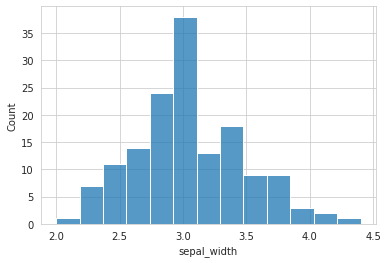

In [16]:
sns.histplot(data=df,x=df['sepal_width'])

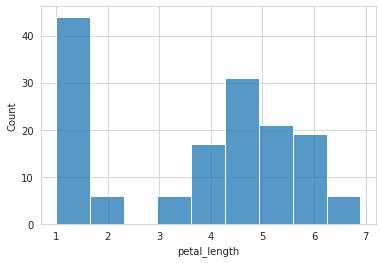

In [17]:
sns.histplot(data=df,x=df['petal_length'])

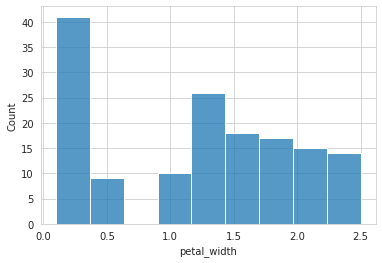

In [18]:
sns.histplot(data=df,x=df['petal_width'])

Step 3: Train-test split for model prediction

In [19]:
X = df.drop('Class',axis=1)
y = df['Class']

In [20]:
print(X)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]


In [21]:
print(y)

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Class, Length: 150, dtype: object


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 1)

In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Step 4: Importing libraries for KNN classifier

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=1)

In [25]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [26]:
y_pred = knn_model.predict(X_test)

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [28]:
print(accuracy_score(y_test,y_pred))

0.9333333333333333


In [29]:
print(confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


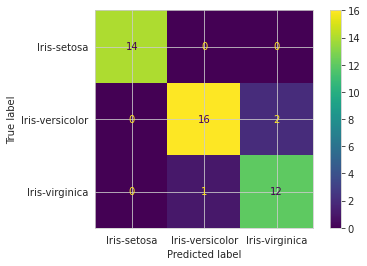

In [30]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(knn_model, X_test, y_test)

In [31]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45



With K = 1, we achieved an accuracy score of 93%. The confusion matrix helps us predict the number of correct and incorrect predictions our model made. 
In this case we have a 3x3 confusion matrix.
For setosa, we predicted all 14 values as setosa. For versicolor the model correctly predicted 16 values and incorrectly predicted 2 values as virginica. In the case of virginica, the model correctly predicted 12 values and incorrectly predicted 1 value as versicolor.

Step 5: Elbow method to calculate optimal K value

In [32]:
test_error_rates = []
for k in range(1,31):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(X_train, y_train)
  y_pred = knn_model.predict(X_test)
  test_error = 1 - accuracy_score(y_test,y_pred)

  test_error_rates.append(test_error)

In [33]:
test_error_rates

[0.06666666666666665,
 0.06666666666666665,
 0.022222222222222254,
 0.0444444444444444,
 0.0444444444444444,
 0.022222222222222254,
 0.022222222222222254,
 0.022222222222222254,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.0444444444444444,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.0444444444444444,
 0.0888888888888889,
 0.06666666666666665,
 0.06666666666666665,
 0.0444444444444444,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665,
 0.06666666666666665]

Text(0.5, 0, 'Kneigbors')

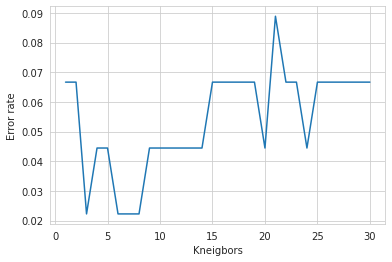

In [34]:
plt.plot(range(1,31),test_error_rates)
plt.ylabel('Error rate')
plt.xlabel('Kneigbors')

Interpreting the plot between error rates and K neighbors, we achieve a low error rate at K=3 which is about 0.022. After K=3 the error rate increases and then finally retains the same error rate as K=3 at K=6 , 7 and 8.
Hence, we can say that the elbow point for the above model is at **K=3**. 

Step 6: Creating a model with Kneighbors = 3.

In [35]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)

In [36]:
print(accuracy_score(y_test,y_pred))

0.9777777777777777


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


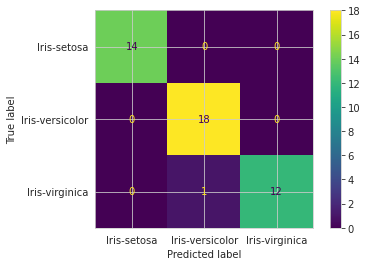

In [37]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(knn_model, X_test, y_test)

In [38]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.95      1.00      0.97        18
 Iris-virginica       1.00      0.92      0.96        13

       accuracy                           0.98        45
      macro avg       0.98      0.97      0.98        45
   weighted avg       0.98      0.98      0.98        45

